# **Project Name**    - Yesbank-Stock-Predictor



##### **Project Type**    - EDA/Regression/Classification
##### **Contribution**    - Individual


# **Project Summary -**

## introduction

The Yes Bank Stock Price Prediction project aims to develop a machine learning model to forecast the monthly closing price of Yes Bank’s stock. The goal is to provide accurate predictions to assist investors in making informed financial decisions and to detect potential stock market fraud.

## Dataset Overview

The dataset includes Yes Bank’s monthly stock prices from July 2005 to November 2020, containing attributes such as opening price, closing price (target variable), highest price, and lowest price.

## Objective

The primary objective is to predict the closing price of Yes Bank stock each month, aiding in investment decisions and identifying fraudulent stock movements.

## Methodology

* Data Preprocessing: Cleaning and normalizing stock price data.

* Exploratory Data Analysis (EDA): Identifying trends, correlations, and anomalies.

* Model Training: Evaluating models like Linear Regression, LSTM, Random Forest, and XGBoost.

* Model Evaluation & Deployment: Selecting the best model based on RMSE and MAE and deploying it via FastAPI or Flask.

## Challenges

- Market Volatility: External factors influence stock prices.

- Data Quality: Ensuring accuracy and eliminating biases.

- Feature Selection: Identifying the most impactful variables.

## Conclusion

This project leverages machine learning to predict stock prices, aiding investors and mitigating stock market fraud. Accurate forecasting can enhance financial planning and regulatory oversight.

# **GitHub Link -**

https://github.com/Josephvarghes/Yesbank-Stock-Predictor

# **Problem Statement**


The primary objective of this project is to develop a machine learning model that accurately predicts the monthly closing price of Yes Bank’s stock. By analyzing historical stock data, the model aims to assist investors in making informed financial decisions and detecting potential stock market fraud. The project leverages key stock attributes such as opening price, highest price, and lowest price to identify trends and anomalies, ensuring robust and reliable predictions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [106]:
# Import Libraries 
import pandas as pd

### Dataset Loading

In [107]:
# Load Dataset 
df = pd.read_csv("dataset/YesBank_StockPrices.csv")

### Dataset First View

In [108]:
# Dataset First Look 
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [109]:
# Dataset Rows & Columns count 
df.shape

(185, 5)

### Dataset Information

In [110]:
# Dataset Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [111]:
# Dataset Duplicate Value Count 
df.duplicated().sum() 

0

#### Missing Values/Null Values

In [112]:
# Missing Values/Null Values Count 
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [113]:
#There is no null values for visualizing Visualizing the missing values 


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [114]:
# Dataset Columns 
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [115]:
# Dataset Describe 
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1. Date: The specific month and year corresponding to the stock data entry.

2. Open: The stock price at the beginning of the month.

3. High: The highest stock price recorded within the month.

4. Low: The lowest stock price recorded within the month.

5. Close: The stock price at the end of the month (target variable for prediction).

The dataset consists of 185 rows and 5 columns, capturing monthly stock price variations of Yes Bank from July 2005 to November 2020.

### Check Unique Values for each variable.

In [116]:
# Check Unique Values for each variable.  
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [117]:
# Write your code to make your dataset analysis ready.  
df.duplicated(subset=['Open'], keep='first') 


0      False
1      False
2      False
3      False
4      False
       ...  
180     True
181    False
182    False
183    False
184    False
Length: 185, dtype: bool

1. Handling Duplicate Values

In [118]:
#Removing duplicated values 
df.drop_duplicates(subset=['Open'], keep='first', inplace=True) 
df.drop_duplicates(subset=['High'], keep='first', inplace=True) 
df.drop_duplicates(subset=['Low'], keep='first', inplace=True) 

In [119]:
df.shape

(180, 5)

2. Convert Date to Proper Format

In [120]:
#changing ate into standard 
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')  


In [121]:
# Step 3: Set 'Date' as the index 

df.set_index('Date', inplace=True)

In [122]:
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

### What all manipulations have you done and insights you found?

We started by cleaning the dataset, first removing duplicate entries to ensure accuracy. Next, we identified outliers using the IQR method and noticed extreme values that could impact analysis. Instead of removing them outright, we applied a log transformation, which helped in smoothing out the distribution while preserving valuable data.

To enhance our analysis, we also worked on feature engineering by extracting the Year and Month from the date column. This allowed us to uncover trends over time, such as seasonal patterns or yearly variations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

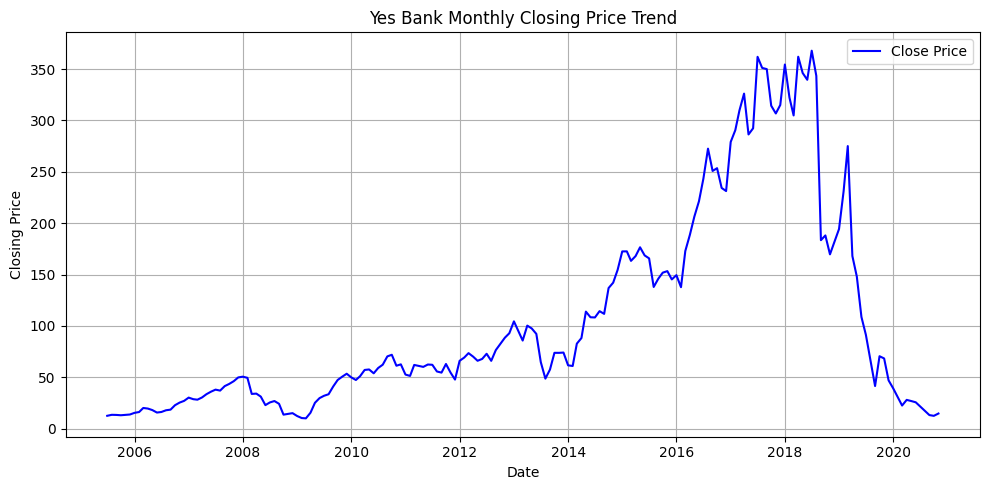

In [123]:
# Step 5: Plot closing price trend 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Yes Bank Monthly Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To easily identify the trend in the closing data(target varivable)

##### 2. What is/are the insight(s) found from the chart?

Clsoing rate high in 2018.it is either a news or eventoccur nor fraud

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason. 
It is good to actually find the reason of closing price there for future improvements

#### Chart - 2

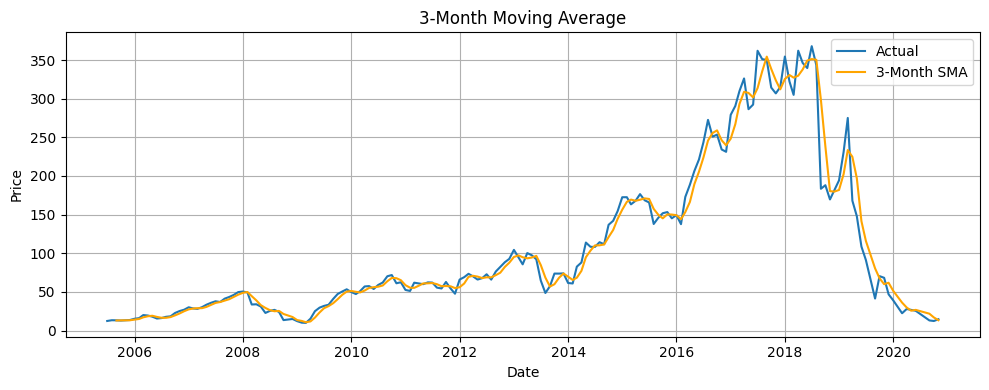

In [124]:
# 2. Moving Average (3-month rolling)
df['SMA_3'] = df['Close'].rolling(window=3).mean()

plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Actual')
plt.plot(df['SMA_3'], label='3-Month SMA', color='orange')
plt.title("3-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

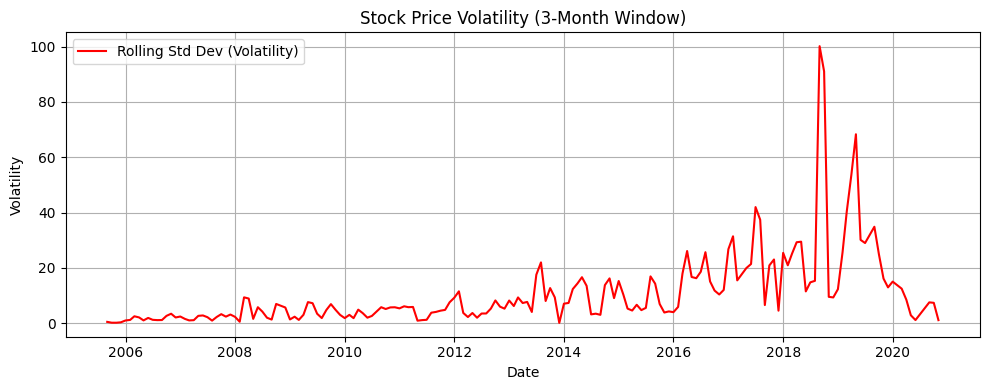

In [125]:
# 3. Volatility - Rolling Standard Deviation
df['Volatility'] = df['Close'].rolling(window=3).std()

plt.figure(figsize=(10, 4))
plt.plot(df['Volatility'], label='Rolling Std Dev (Volatility)', color='red')
plt.title("Stock Price Volatility (3-Month Window)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

To identify the trend in the closing price(in detail)

##### 2. What is/are the insight(s) found from the chart?

We find that between 2018 to 2020, something big change happende.We have to find the what is the reason behind the swing the data

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will depend upon the reason which say it is good or bad

#### Chart - 4

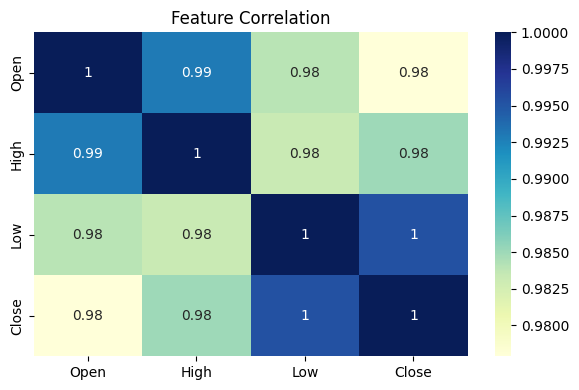

In [126]:
# 4. Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To find the correlation between the variables

##### 2. What is/are the insight(s) found from the chart?

We found that Low and close has high correlation(1) that open and close(0.98)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Definitely,So this can be used for building effecient model easily.

#### Chart - 5

In [127]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### Checking the data spike is needed to remove or not

<Axes: title={'center': 'Spike Check: 2018-2020'}, xlabel='Date'>

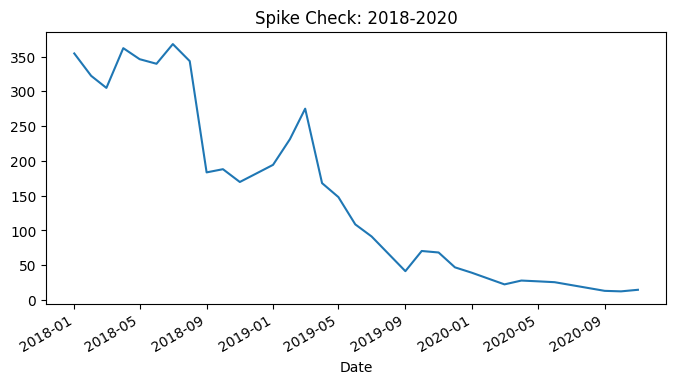

In [128]:
# Zoom into spike area (2018 to 2020)
df_spike = df['2018':'2020']
df_spike['Close'].plot(figsize=(8, 4), title="Spike Check: 2018-2020")


we undertand that we need this rice and fall, because it is not scam,it is actually real transaction data

# Feature Engineering

We'll prepare the dataset smartly using real-world features to help our model understand price behavior better.

###  Step 1: Add Spike Period Flag

In [129]:
# Create a binary feature marking 2018–2020 crash period
df['SpikePeriod'] = ((df.index >= '2018-01') & (df.index <= '2020-12')).astype(int)


### Step 2: Add Moving Averages (Smoothing) 

In [130]:
# Add 3-month and 6-month Simple Moving Averages
df['SMA_3'] = df['Close'].rolling(window=3).mean()
df['SMA_6'] = df['Close'].rolling(window=6).mean()


In [131]:
df['SMA_3_shifted'] = df['SMA_3'].shift(1)


###  Step 3: Add Lag Features (past values as predictors)

In [132]:
# Previous month closing prices
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)


### Step 4: Drop Nulls (caused by shifting & moving average)

In [133]:
df.dropna(inplace=True)


### Final: See your updated dataset

In [ ]:
df.head(10)

 # Display first 10 rows of the modified DataFrame

,Open,High,Low,Close,SMA_3,Volatility,SpikePeriod,SMA_6,SMA_3_shifted,Close_Lag1,Close_Lag2
Date,,,,,,,,,,,
2005-12-01,13.49,14.44,13.00,13.71,13.370000,0.361663,0,13.215000,13.233333,13.41,12.99
2006-01-01,13.68,17.16,13.58,15.33,14.150000,1.032860,0,13.693333,13.370000,13.71,13.41
2006-02-01,15.50,16.97,15.40,16.12,15.053333,1.228590,0,14.143333,14.150000,15.33,13.71
2006-03-01,16.20,20.95,16.02,20.08,17.176667,2.545198,0,15.273333,15.053333,16.12,15.33
2006-04-01,20.56,20.80,18.02,19.49,18.563333,2.136453,0,16.356667,17.176667,20.08,16.12
2006-05-01,19.80,21.80,15.80,18.03,19.200000,1.055320,0,17.126667,18.563333,19.49,20.08
2006-06-01,18.20,18.40,13.40,15.62,17.713333,1.954337,0,17.445000,19.200000,18.03,19.49
2006-07-01,16.00,17.20,13.82,16.16,16.603333,1.264687,0,17.583333,17.713333,15.62,18.03
2006-08-01,15.90,18.60,15.70,17.84,16.540000,1.157756,0,17.870000,16.603333,16.16,15.62


## ***7. ML Model Implementation***

### ML Model - 1

###  Step 1: Import Libraries

In [ ]:
#Importing all necesaary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


###  Step 2: Select Features & Target

In [136]:
# 🎯 Target
y = df['Close']

# 📦 Features (you can experiment with more later)
X = df[['SMA_3_shifted','SMA_6','Volatility','Close_Lag1', 'Close_Lag2']]


###  Step 3: Split into Train & Test

In [137]:
# Train on 80%, test on 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


### Step 4: Scale the Features (Important for LR)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


###  Step 5: Train the Model

In [139]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

### Step 7: Make Predictions

In [140]:
y_pred = model.predict(X_test_scaled)


### Step 8: Evaluate the Model

In [141]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"MAE : {mae:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Performance:
RMSE: 51.66
MAE : 35.13
R² Score: 0.84


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

C:\Users\user\AppData\Local\Temp\ipykernel_14368\3233394314.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


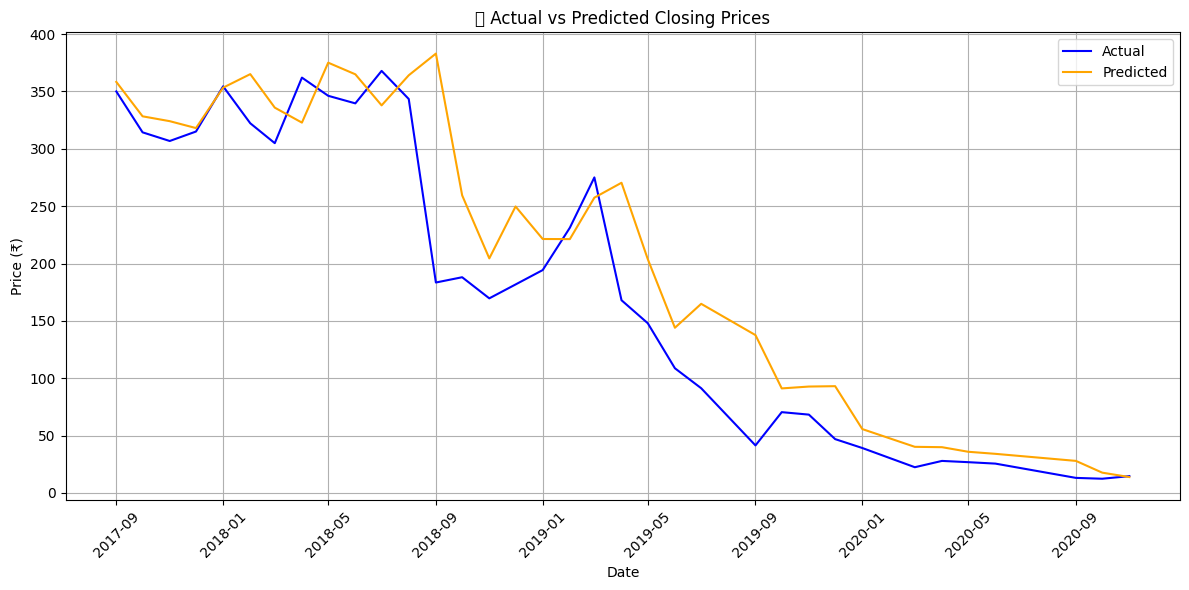

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame to compare actual vs predicted
results = pd.DataFrame({
    'Date': X_test.index,
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Actual', data=results, label='Actual', color='blue')
sns.lineplot(x='Date', y='Predicted', data=results, label='Predicted', color='orange')
plt.title('📈 Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14368\1200009603.py:12: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


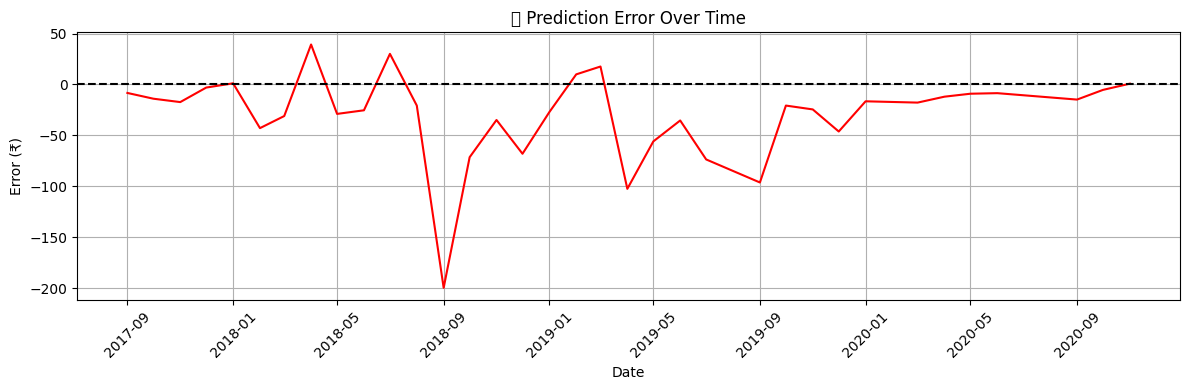

In [153]:
# Residual = Actual - Predicted
results['Error'] = results['Actual'] - results['Predicted']

plt.figure(figsize=(12, 4))
sns.lineplot(x='Date', y='Error', data=results, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title('🧪 Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Error (₹)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14368\202938713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette="coolwarm")
C:\Users\user\AppData\Local\Temp\ipykernel_14368\202938713.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


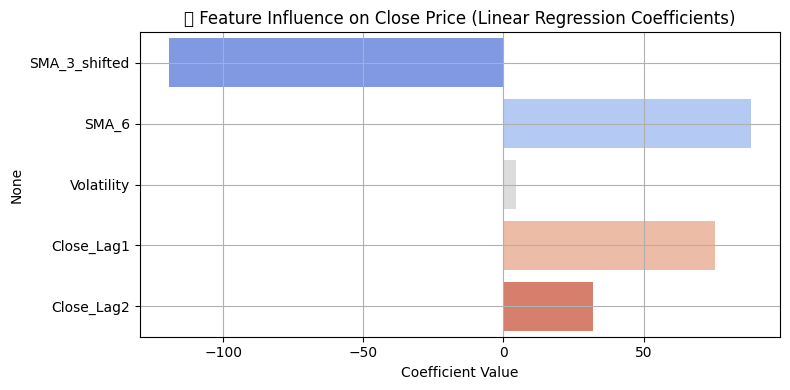

In [154]:
# Feature Importance = coefficients
features = X.columns
coefficients = model.coef_

plt.figure(figsize=(8, 4))
sns.barplot(x=coefficients, y=features, palette="coolwarm")
plt.title('📊 Feature Influence on Close Price (Linear Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.grid()
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [144]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [145]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [146]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [147]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [148]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [149]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [150]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [151]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***